In [5]:
import datetime
from datetime import date
import numpy as np
import pandas as pd
import yfinance
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import plot_plotly
import seaborn as sns
import plotly.offline as py
import warnings
warnings.filterwarnings("ignore")
sns.set()

In [6]:
today = date.today()
today

datetime.date(2021, 12, 30)

In [10]:
# 7 days ago date
date_7_days_ago = date.today() - datetime.timedelta(days=7)
date_7_days_ago

datetime.date(2021, 12, 23)

In [11]:
raw_data = yfinance.download (tickers = "^BSESN ^NSEI ^FTSE ^N225 ^NYA", start = "2008-09-29", end = date_7_days_ago,
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)

[*********************100%***********************]  5 of 5 completed


In [12]:
df_comp = raw_data.copy()

In [13]:
df_comp['sensex'] = df_comp['^BSESN'].Close[:]
df_comp['nifty'] = df_comp['^NSEI'].Close[:]
df_comp['ftse'] = df_comp['^FTSE'].Close[:]
df_comp['nikkei'] = df_comp['^N225'].Close[:]
df_comp['nyse'] = df_comp['^NYA'].Close[:]

In [14]:
df_comp = df_comp.iloc[1:]
del df_comp['^BSESN']
del df_comp['^NSEI']
del df_comp['^FTSE']
del df_comp['^N225']
del df_comp['^NYA']
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [15]:
df_comp.tail()

sensex         nifty         ftse        nikkei  \
                                                                    
Date                                                                
2021-12-16  57901.140625  17248.400391  7260.600098  29066.320312   
2021-12-17  57011.738281  16985.199219  7269.899902  28545.679688   
2021-12-20  55822.011719  16614.199219  7198.000000  27937.810547   
2021-12-21  56319.011719  16770.849609  7297.399902  28517.589844   
2021-12-22  56930.558594  16955.449219  7341.700195  28562.210938   

                    nyse  
                          
Date                      
2021-12-16  16849.089844  
2021-12-17  16668.640625  
2021-12-20  16442.310547  
2021-12-21  16744.269531  
2021-12-22  16874.880859

In [16]:
df_nifty = df_comp["nifty"]

In [17]:
nifty = df_nifty.reset_index()

In [18]:
nifty.rename(columns = {'Date':'ds', 'nifty':'y'}, inplace = True)

In [19]:
m = Prophet(
    growth="linear",
    #holidays=holidays,
    #seasonality_mode="multiplicative",
    changepoint_prior_scale=30,
    seasonality_prior_scale=35,
    ###cap=3.00,
    ###floor=.65*125,
    holidays_prior_scale=20,
    daily_seasonality=False,
    weekly_seasonality=False,
    yearly_seasonality=False,
    ).add_seasonality(
        name='monthly',
        period=30.5,
        fourier_order=55
    ).add_seasonality(
        name='daily',
        period=1,
        fourier_order=15
    ).add_seasonality(
        name='weekly',
        period=7,
        fourier_order=20
    ).add_seasonality(
        name='yearly',
        period=365.25,
        fourier_order=20
    ).add_seasonality(
        name='quarterly',
        period=365.25/4,
        fourier_order=5,
        prior_scale=15)

In [20]:
m.fit(nifty)

In [21]:
### Number of Days for prediction is define here!
pred_days = 7

In [22]:
future = m.make_future_dataframe(periods = pred_days)

In [23]:
future.tail()

ds
3454 2021-12-25
3455 2021-12-26
3456 2021-12-27
3457 2021-12-28
3458 2021-12-29

In [24]:
forecast = m.predict(future)

In [25]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds          yhat    yhat_lower    yhat_upper
3454 2021-12-25  16730.554983  15836.384571  17580.842096
3455 2021-12-26  16747.216045  15834.119828  17681.020298
3456 2021-12-27  16485.120620  15525.399028  17377.753758
3457 2021-12-28  16473.980070  15525.501781  17405.322395
3458 2021-12-29  16519.067970  15570.229070  17441.458721

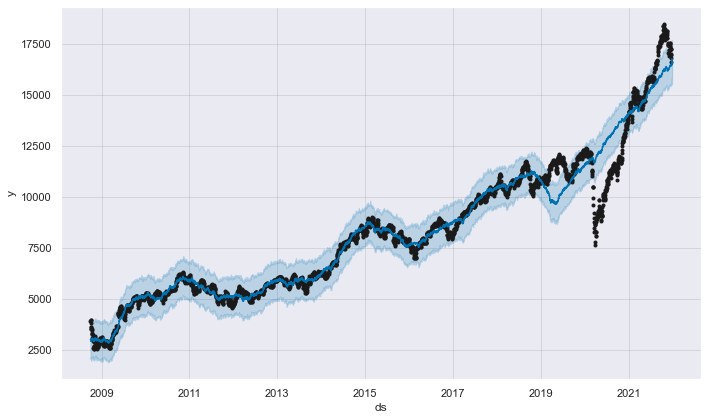

In [26]:
fig1 = m.plot(forecast)

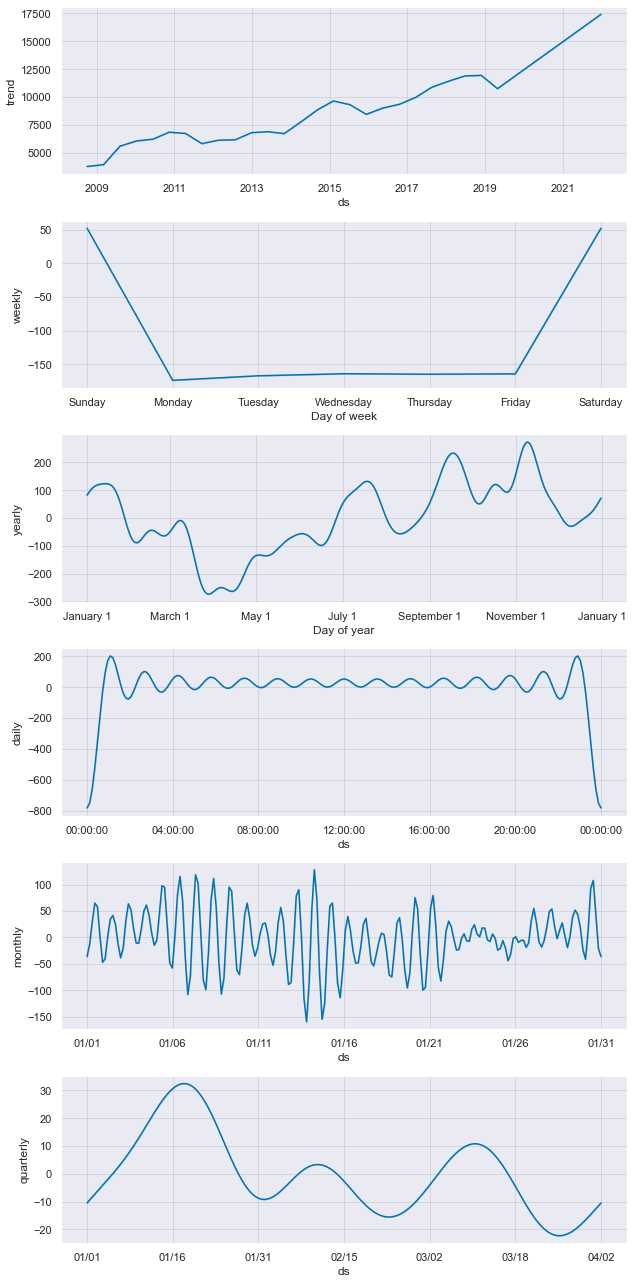

In [27]:
fig2 = m.plot_components(forecast)

In [28]:
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)

In [30]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

ds          yhat    yhat_lower    yhat_upper
3449 2021-12-20  16450.350051  15528.532739  17422.479987
3450 2021-12-21  16430.224300  15472.440300  17331.283285
3451 2021-12-22  16441.965230  15533.520322  17353.304364
3452 2021-12-23  16421.809895  15493.532190  17320.141680
3453 2021-12-24  16464.071781  15495.258229  17382.123880
3454 2021-12-25  16730.554983  15836.384571  17580.842096
3455 2021-12-26  16747.216045  15834.119828  17681.020298
3456 2021-12-27  16485.120620  15525.399028  17377.753758
3457 2021-12-28  16473.980070  15525.501781  17405.322395
3458 2021-12-29  16519.067970  15570.229070  17441.458721